## Import Libraries

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Importing Data of Breast Cancer

In [7]:
df=pd.read_csv("data (1).csv")

# Data Preproccing

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

## Replacing the output from letters to numbers to enter it to the model

In [9]:
df.diagnosis.replace("M",1,inplace=True)
df.diagnosis.replace("B",0,inplace=True)

df.diagnosis.dtype

dtype('int64')

In [10]:
df.isna().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

Text(0, 0.5, 'Begign or malignant')

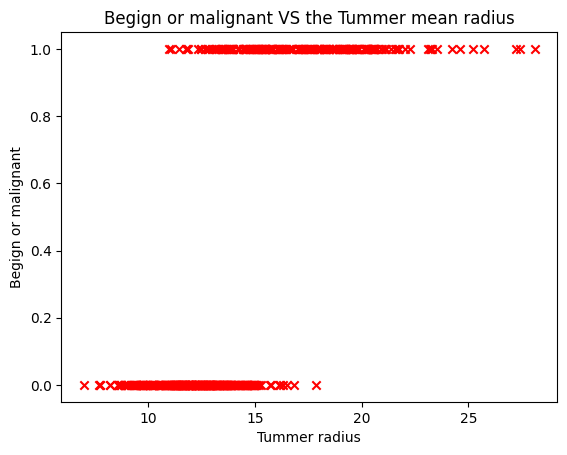

In [11]:
plt.scatter(x=df["radius_mean"],y=df["diagnosis"],marker="x",c='r')

plt.title("Begign or malignant VS the Tummer mean radius")
plt.xlabel("Tummer radius")
plt.ylabel("Begign or malignant")

# Machine Learning Model for Classification

## Import Sklearn

In [12]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
from sklearn.preprocessing import StandardScaler

In [33]:
X=df.radius_mean
Y=df.diagnosis
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3)


In [34]:
print(f"the train dataset X {X_train} & Y {Y_train} and the dataset X {X_test} & Y {Y_test}")

the train dataset X 550    10.86
554    12.88
446    17.75
25     17.14
19     13.54
       ...  
517    19.89
301    12.46
162    19.59
339    23.51
204    12.47
Name: radius_mean, Length: 398, dtype: float64 & Y 550    0
554    0
446    1
25     1
19     0
      ..
517    1
301    0
162    1
339    1
204    0
Name: diagnosis, Length: 398, dtype: int64 and the dataset X 520     9.295
70     18.940
297    11.760
467     9.668
538     7.729
        ...  
202    23.290
544    13.870
434    14.860
423    13.660
551    11.130
Name: radius_mean, Length: 171, dtype: float64 & Y 520    0
70     1
297    1
467    0
538    0
      ..
202    1
544    0
434    0
423    0
551    0
Name: diagnosis, Length: 171, dtype: int64


In [24]:
# if I have muliple parameters I need to make feature scaling
SC=StandardScaler()
X_train=SC.fit_transform(X_train)
X_test=SC.transform(X_test)

## building Model 

### Creating object of LogisticRegression class

In [63]:
Model=LogisticRegression()

### Fit model using optimizer to get the parameters of the model W and b

In [65]:
X_train = np.array(X_train).reshape(-1, 1) # reshape the data to can take one feature
X_test = np.array(X_test).reshape(-1, 1)

Y_train = np.array(Y_train)

Model.fit(X_train,Y_train) # using to get the parameters of the model W and b

c:\Users\20111\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

### after geting parameter using it to predict with different test data set

In [79]:
predictions_prob = Model.predict_proba(X_test)
predications= Model.predict(X_test)
predications

array([0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0], dtype=int64)

## Model Performance

### Confusion Matrix

In [73]:
confusion_matrix(Y_test ,predications)

array([[99,  5],
       [17, 50]], dtype=int64)

### Accuracy of Train data set

In [80]:
f"The Model reach to accuracy in training data set equal {accuracy_score(Y_train,Model.predict(X_train))*100}"

'The Model reach to accuracy in training data set equal 88.44221105527639'

### Accuracy of test data set

In [81]:
f"The Model reach to accuracy in test data set equal {accuracy_score(Y_test,predications)*100}"

'The Model reach to accuracy in test data set equal 87.13450292397661'